In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import glob

In [55]:
# known_tois = pd.read_csv('../data/toi-catalog.csv', skiprows =2)
known_tois = pd.read_csv('../data/PS_2025.08.05_10.28.29.csv', skiprows =104)

known_tois

,pl_name,hostname,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,LP 890-9 b,LP 890-9,TIC 44898913,Gaia DR2 4886243456388510720,0,1,2,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,11.344,0.023,-0.023,15.82130,0.000763,-0.000763,2023-03-16,2017-07,2023-03-16
1,LP 890-9 b,LP 890-9,TIC 44898913,Gaia DR2 4886243456388510720,1,1,2,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,11.344,0.023,-0.023,15.82130,0.000763,-0.000763,2022-09-14,2022-09,2022-09-14
2,LP 791-18 b,LP 791-18,TIC 181804752,Gaia DR2 3562427951852172288,0,1,3,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,10.644,0.023,-0.023,15.07150,0.001324,-0.001324,2019-11-01,2019-09,2019-11-07
3,LP 791-18 c,LP 791-18,TIC 181804752,Gaia DR2 3562427951852172288,0,1,3,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,10.644,0.023,-0.023,15.07150,0.001324,-0.001324,2019-11-01,2019-09,2019-11-07
4,LP 791-18 c,LP 791-18,TIC 181804752,Gaia DR2 3562427951852172288,0,1,3,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,10.644,0.023,-0.023,15.07150,0.001324,-0.001324,2024-03-04,2023-03,2024-03-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,TOI-3757 b,TOI-3757,TIC 445751830,Gaia DR2 996878131494639488,0,1,1,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),...,-0.064,11.152,0.020,-0.020,14.13210,0.000442,-0.000442,2024-09-16,2017-07,2024-09-16
449,TOI-2379 b,TOI-2379,TIC 201177276,Gaia DR2 6521531466699512064,0,1,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),...,-0.069,11.477,0.023,-0.023,14.66010,0.000323,-0.000323,2025-04-21,2017-07,2025-04-21
450,TOI-5616 b,TOI-5616,TIC 154220877,Gaia DR2 1545570133528453888,1,1,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),...,-0.200,12.735,0.025,-0.025,15.63060,0.000469,-0.000469,2024-08-30,2024-08,2024-08-30
451,TOI-2427 b,TOI-2427,TIC 142937186,Gaia DR2 5055663973297050624,1,1,1,Transit,2022,Transiting Exoplanet Survey Satellite (TESS),...,-0.011,7.048,0.024,-0.024,9.81845,0.000540,-0.000540,2022-02-15,2022-02,2022-02-15


In [3]:
glob.glob('../toi_data/*check')[0].split('/')[2].split('-')[1].split('_')[0]

'153078576'

In [56]:
tic_ids = ['TIC '+(file.split('/')[2].split('-')[1].split('_')[0]) for file in glob.glob('../toi_data/*check')]

In [57]:
tic_ids

['TIC 153078576',
 'TIC 332657786',
 'TIC 102734241',
 'TIC 126606859',
 'TIC 166184428',
 'TIC 198485881',
 'TIC 343628284',
 'TIC 220479565',
 'TIC 240968774',
 'TIC 260708537',
 'TIC 286201103',
 'TIC 306996324',
 'TIC 36724087',
 'TIC 387690507',
 'TIC 413248763',
 'TIC 441738827',
 'TIC 95057860',
 'TIC 118327550',
 'TIC 153065527',
 'TIC 181804752',
 'TIC 20182780',
 'TIC 233602827',
 'TIC 260004324',
 'TIC 285048486',
 'TIC 321669174',
 'TIC 351601843',
 'TIC 370133522',
 'TIC 407591297',
 'TIC 4918918',
 'TIC 98796344',
 'TIC 163539739',
 'TIC 193634953',
 'TIC 362249359',
 'TIC 219041246',
 'TIC 239332587',
 'TIC 259377017',
 'TIC 284441182',
 'TIC 305048087',
 'TIC 34068865',
 'TIC 410153553',
 'TIC 439456714',
 'TIC 470381900',
 'TIC 77156829',
 'TIC 103633434',
 'TIC 142748283',
 'TIC 166648874',
 'TIC 200322593',
 'TIC 22233480',
 'TIC 243185500',
 'TIC 261135533',
 'TIC 28900646',
 'TIC 307210830',
 'TIC 348755728',
 'TIC 368287008',
 'TIC 388076422',
 'TIC 445751830',
 '

In [59]:
known_tois[known_tois.tic_id.isin(tic_ids)].reset_index(drop=True).columns

Index(['pl_name', 'hostname', 'tic_id', 'gaia_id', 'default_flag', 'sy_snum',
       'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_ma

In [84]:
known_tois['transit_depth'] = (known_tois.pl_rade/known_tois.st_rad/109.076)**2

In [85]:
searched_tois = known_tois[known_tois.tic_id.isin(tic_ids) & known_tois['default_flag']==1].reset_index(drop=True)[['tic_id', 'pl_orbper', 'transit_depth']]

# searched_tois.TIC = 'TIC '+str(searched_tois.TIC)


In [80]:
# known_tois.pl_rade/known_tois.st_rad/109.076

0      0.079674
1      0.077774
2      0.060047
3      0.123847
4           NaN
         ...   
448    0.178945
449    0.166137
450    0.152988
451    0.025388
452    0.154477
Length: 453, dtype: float64

In [44]:
# searched_tois = searched_tois[searched_tois['Orbital Period (days) Value']<1E3]

In [46]:
# set(searched_tois['TOI Disposition'])

{'CP', 'PC'}

In [63]:
# searched_tois['Transit Depth Value'] = searched_tois['Transit Depth Value']/1E6
searched_tois.tic_id

0       TIC 44898913
1      TIC 181804752
2      TIC 181804752
3      TIC 410153553
4      TIC 200322593
           ...      
134    TIC 445751830
135    TIC 201177276
136    TIC 285048486
137     TIC 95057860
138    TIC 289164482
Name: tic_id, Length: 139, dtype: object

In [69]:
convergence_test_files = glob.glob('../checking_convergence_output/*')

In [72]:

converg_tests = pd.concat((pd.read_csv(f, index_col = 0) for f in convergence_test_files), ignore_index=True)
converg_tests.TICID = ['TIC '+str(converg_tests.TICID[x] ) for x in range(len(converg_tests))]

In [73]:
converg_tests

,TICID,t0,per,depth,converged,conv_on_run
0,TIC 353475866,1836.238000,13.285000,0.003000,True,2.0
1,TIC 458419328,1842.793000,4.675000,0.012000,True,1.0
2,TIC 4918918,1880.062000,15.608000,0.005000,True,1.0
3,TIC 52005579,2447.743000,6.767000,0.001000,True,1.0
4,TIC 377293776,1684.374959,1.645956,0.000174,False,NaN
...,...,...,...,...,...,...
519,TIC 260004324,1348.884738,41.847383,0.006971,False,NaN
520,TIC 260004324,1348.098738,45.879209,0.006707,False,NaN
521,TIC 103633434,2397.490000,31.962000,0.001000,False,NaN
522,TIC 103633434,2415.892000,25.589000,0.001000,False,NaN


In [74]:
real_val_conv_test = converg_tests.copy()

In [76]:

for indx, row in real_val_conv_test.iterrows():
    ticid = row.TICID
    toi = searched_tois[searched_tois['tic_id']==ticid].reset_index(drop=True)
    
    t0_found  = row.t0
    per_found = row.per
    
    for toi_indx, toi_row in toi.iterrows():
#         t0_known = toi_row['Orbital Epoch Value']
        per_known = toi_row['pl_orbper']

#         num_epochs = abs(t0_found-t0_known)/per_known

#         check_int = (abs(num_epochs - np.round(num_epochs, 1)) < 1E-2) or (abs(1/num_epochs - np.round(1/num_epochs, 1)) < 1E-2)

# #         print(abs(num_epochs - np.round(num_epochs, 1)), abs(1/num_epochs - np.round(1/num_epochs, 1)))
# #         print(check_int)
#         if check_int:
#             real_val_conv_test.loc[indx,'t0'] = t0_known
        
        
        per_int = per_known/per_found
        
        check_per = (abs(per_int - np.round(per_int, 1)) < 1E-2) or (abs(1/per_int - np.round(1/per_int, 1)) < 1E-2)
        print(check_per)

        if check_per:
            real_val_conv_test.loc[indx,'per'] = per_known
        
        

False
True
False
False
True
True
True
False
True
False
False
False
False
False
True
True
False
True
False
False
False
False
False
True
True
False
False
True
True
False
False
True
False
False
True
True
False
True
False
True
True
True
True
False
False
True
True
True
False
False
True
False
False
False
True
True
True
False
False
False
True
False
True
False
False
True
True
False
True
True
True
False
True
True
True
True
True
True
False
True
True
False
True
True
True
True
True
True
True
True
False
False
True
True
True
False
True
False
True
False
False
True
True
True
False
False
False
False
True
True
True
False
False
True
True
False
True
True
False
False
False
False
True
True
True
True
True
False
False
False
False
True
True
True
True
True
True
False
True
True
True
False
False
True
True
True
True
False
True
True
False
True
True
False
False
True
True
False
True
False
True
True
True
False
False
True
False
True
True
True
True
False
False
False
True
False
False
True
False
True
True
True
False
True


In [52]:
searched_tois[searched_tois['TIC']==46432937]

,TIC,Orbital Epoch Value,Orbital Period (days) Value,Transit Depth Value,TOI Disposition


Text(0, 0.5, 'TICID')

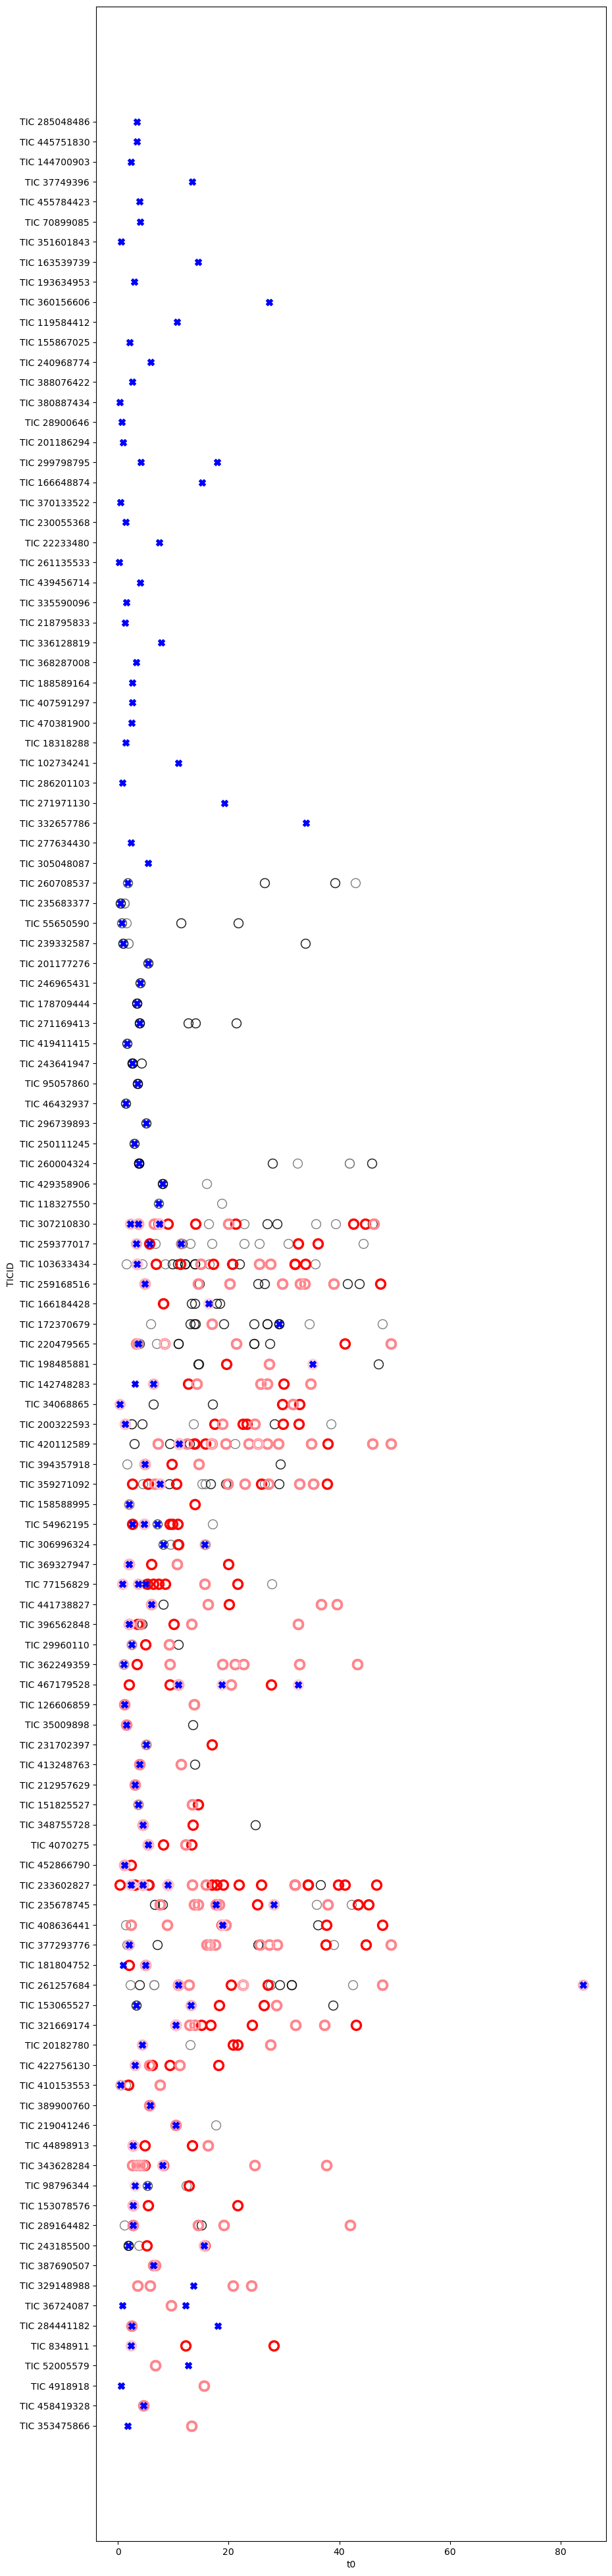

In [87]:
fig, axs = plt.subplots(1, figsize=(10, 50))

axs.plot(converg_tests[converg_tests['converged'] == True].per, converg_tests[converg_tests['converged'] == True].TICID.astype(str), marker='o', markersize=10, 
            markerfacecolor='none', markeredgecolor='red', linestyle='None', markeredgewidth = 2.5, zorder = 50)

axs.plot(converg_tests[converg_tests['converged'] == False].per, converg_tests[converg_tests['converged'] == False].TICID.astype(str), marker='o', markersize=10, 
            markerfacecolor='none', markeredgecolor='grey', linestyle='None', markeredgewidth = 1, zorder = 10)


axs.plot(real_val_conv_test[real_val_conv_test['converged'] == True].per, real_val_conv_test[real_val_conv_test['converged'] == True].TICID.astype(str), marker='o', markersize=10, 
            markerfacecolor='none', markeredgecolor='pink', linestyle='None', markeredgewidth = 2.5, zorder = 500, alpha = 0.7)

axs.plot(real_val_conv_test[real_val_conv_test['converged'] == False].per, real_val_conv_test[real_val_conv_test['converged'] == False].TICID.astype(str), marker='o', markersize=10, 
            markerfacecolor='none', markeredgecolor='black', linestyle='None', markeredgewidth = 1, zorder = 10, alpha = 0.7)


# axs.scatter(searched_tois['Orbital Epoch Value'], searched_tois['TIC'].astype(str), color = 'b', marker = 'X', s = 50, zorder = 100)
axs.scatter(searched_tois['pl_orbper'], searched_tois['tic_id'].astype(str), color = 'b', marker = 'X', s = 50, zorder = 1E3)
# axs.scatter(searched_tois['transit_depth'], searched_tois['tic_id'].astype(str), color = 'b', marker = 'X', s = 50, zorder = 1E3)

# axs.set_yticks([str(tic) for tic in tic_ids])
axs.set_xlabel('t0')
axs.set_ylabel('TICID')